In [44]:
#HERE YOU FIND ALL THE LIBRARYS FOR THIS PROJECT
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.
/opt/jupyterhub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [18]:
#SELECT THE DATA TO USE
df = pd.read_csv('//datc//opschaler//combined_gas_smart_weather_dfs//processed//all_dwellings_combined_hour.csv', delimiter='\t', parse_dates=['datetime'])
df = df.set_index(['datetime'])
df = df.dropna()

df['gasPower'] = df['gasPower']*10
df['T-1'] = df['T'].shift(1)

In [19]:
#RESAMPLE TO ONE DAY DATA
df_day = df.resample('1D').mean()
df_day = df_day.dropna()

In [20]:
df_day['hour'] = df_day.index.hour #create column containing the hour
df_day['dayofweek'] = df_day.index.dayofweek #Create column containing the day of the week

columns_to_cat = ['hour', 'dayofweek']
df_day[columns_to_cat] = df_day[columns_to_cat].astype('category') # change datetypes to category

df_day = pd.get_dummies(df_day, columns=columns_to_cat) # One hot encoding the categories

In [21]:
df_day.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,gasPower,T-1,hour_0,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
datetime,,,,,,,,,,,,,,,,,,,,,
2017-02-22,1556.361003,0.0,1803.676799,0.0,185.730438,0.0,1678.554576,243.831944,444.333333,8.236250,...,2.562459,10.462500,1,0,0,1,0,0,0,0
2017-02-23,1558.435883,0.0,1805.226395,0.0,173.374907,0.0,1685.894847,239.148194,265.916667,11.608438,...,4.857127,8.737917,1,0,0,0,1,0,0,0
2017-02-24,1561.837229,0.0,1806.231979,0.0,246.992340,0.0,1694.890589,278.093543,45.766667,5.032826,...,2.768300,4.901806,1,0,0,0,0,1,0,0
2017-02-25,1564.963013,0.0,1808.506632,0.0,150.144606,0.0,1698.313894,202.265418,14.750000,6.502271,...,0.171661,5.321389,1,0,0,0,0,0,1,0
2017-02-26,1564.963013,0.0,1817.410950,0.0,679.171475,0.0,1706.148254,208.350207,82.633334,7.540049,...,5.030009,8.603333,1,0,0,0,0,0,0,1


In [22]:
X = df_day[['T','T-1','dayofweek_0','dayofweek_1','dayofweek_2','dayofweek_3','dayofweek_4','dayofweek_5','dayofweek_6']]
y = df_day[['gasPower']]

test_size = 0.5

split_index = int(df_day.shape[0]*test_size) # the index at which to split df into train and test

X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]
        

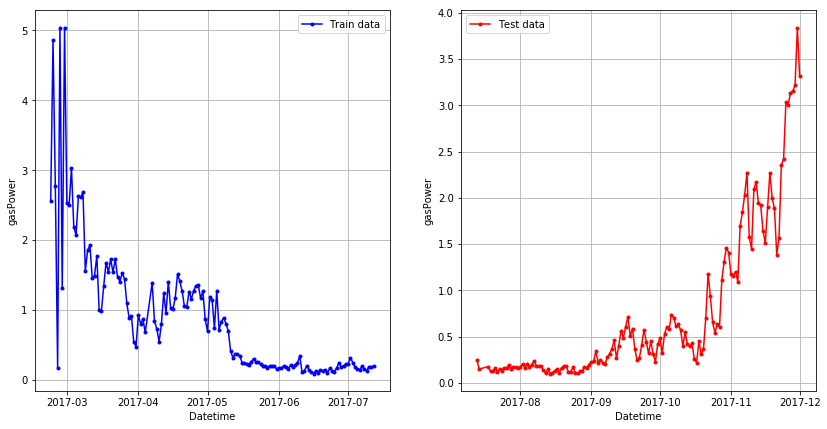

In [40]:
plt.style.use('default')
%matplotlib inline
plt.figure(figsize=(14,7))


plt.subplot(1,2,1)
plt.grid(True)
plt.plot(X_train.index,y_train,'.-',color='b',label='Train data')
plt.xlabel('Datetime')
plt.ylabel('gasPower')
plt.legend()

plt.subplot(1,2,2)
plt.grid(True)
plt.plot(X_test.index,y_test,'.-',color='r',label='Test data')
plt.xlabel('Datetime')
plt.ylabel('gasPower')
plt.legend()

plt.show()

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
forecast = Sequential()

forecast.add()